In [40]:
!pip install yfinance

# importing libraries 

In [41]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")


# importing the data from yahoofinance

In [42]:
# Get the data
btc= yf.Ticker("BTC-USD")
df = btc.history(period="max")

## Exploratory Data Anaysis(EDA)

In [43]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [44]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-09 00:00:00+00:00,22946.566406,22996.437500,21773.974609,21819.039062,32572572185,0.0,0.0
2023-02-10 00:00:00+00:00,21819.005859,21941.185547,21539.392578,21651.183594,27078406594,0.0,0.0
2023-02-11 00:00:00+00:00,21651.841797,21891.410156,21618.449219,21870.875000,16356226232,0.0,0.0
2023-02-12 00:00:00+00:00,21870.902344,22060.994141,21682.828125,21788.203125,17821046406,0.0,0.0
2023-02-13 00:00:00+00:00,21795.058594,21892.888672,21705.009766,21751.298828,20209754112,0.0,0.0


In [47]:
df.shape

(3072, 7)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3072 entries, 2014-09-17 00:00:00+00:00 to 2023-02-13 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3072 non-null   float64
 1   High          3072 non-null   float64
 2   Low           3072 non-null   float64
 3   Close         3072 non-null   float64
 4   Volume        3072 non-null   int64  
 5   Dividends     3072 non-null   float64
 6   Stock Splits  3072 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 192.0 KB


In [49]:
df.drop(["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1,inplace=True)
df

,Close
Date,
2014-09-17 00:00:00+00:00,457.334015
2014-09-18 00:00:00+00:00,424.440002
2014-09-19 00:00:00+00:00,394.795990
2014-09-20 00:00:00+00:00,408.903992
2014-09-21 00:00:00+00:00,398.821014
...,...
2023-02-09 00:00:00+00:00,21819.039062
2023-02-10 00:00:00+00:00,21651.183594
2023-02-11 00:00:00+00:00,21870.875000


In [50]:
# Add the year, month, and day columns to the dataframe
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [51]:
df

,Close,Year,Month,Day
Date,,,,
2014-09-17 00:00:00+00:00,457.334015,2014,9,17
2014-09-18 00:00:00+00:00,424.440002,2014,9,18
2014-09-19 00:00:00+00:00,394.795990,2014,9,19
2014-09-20 00:00:00+00:00,408.903992,2014,9,20
2014-09-21 00:00:00+00:00,398.821014,2014,9,21
...,...,...,...,...
2023-02-09 00:00:00+00:00,21819.039062,2023,2,9
2023-02-10 00:00:00+00:00,21651.183594,2023,2,10
2023-02-11 00:00:00+00:00,21870.875000,2023,2,11


# Data visualization

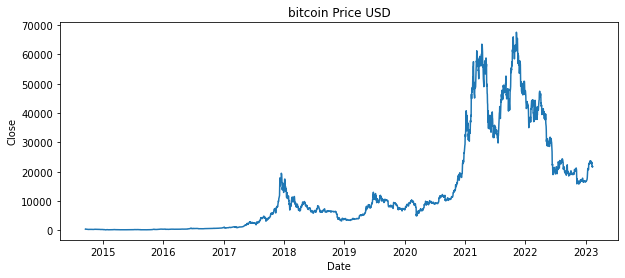

In [70]:
df.dropna()
plt.figure(figsize=(10, 4))
plt.title("bitcoin Price USD")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()

In [71]:
#Splitting the dataset
X = df.drop( ['Close'], axis = 1)
Y = df['Close']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3072 entries, 2014-09-17 00:00:00+00:00 to 2023-02-13 00:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    3072 non-null   int64
 1   Month   3072 non-null   int64
 2   Day     3072 non-null   int64
dtypes: int64(3)
memory usage: 96.0 KB


In [57]:
Y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3072 entries, 2014-09-17 00:00:00+00:00 to 2023-02-13 00:00:00+00:00
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3072 non-null   float64
dtypes: float64(1)
memory usage: 48.0 KB


In [59]:
#Splitting the data as the trainning & testing as 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [60]:
X_train.head()

,Year,Month,Day
Date,,,
2022-07-30 00:00:00+00:00,2022,7,30
2019-09-09 00:00:00+00:00,2019,9,9
2016-09-16 00:00:00+00:00,2016,9,16
2021-09-21 00:00:00+00:00,2021,9,21
2021-01-30 00:00:00+00:00,2021,1,30


In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2150, 3)
(2150,)
(922, 3)
(922,)


# Algorithms

# KNeighborsRegressor

In [74]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
mse_knr=metrics.mean_squared_error(y_test,y_pred_knr)
print(mse_knr)
r2knr = metrics.r2_score(y_test, y_pred_knr)
print(r2knr)

70640993.25932018
0.7459780274038486


# RandomForestRegressor

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf=metrics.mean_squared_error(y_test,y_pred_rf)
print(mse_rf)
r2rf = metrics.r2_score(y_test, y_pred_rf)
print(r2rf)

876281.0139206419
0.9968489311738931


# DecisionTreeRegressor

In [66]:
dt =tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt=metrics.mean_squared_error(y_test,y_pred_dt)
print(mse_dt)
r2dt = metrics.r2_score(y_test, y_pred_dt)
print(r2dt)

1796675.292919455
0.9935392329444355


# GradientBoostingRegressor

In [67]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
Y_pred_gbr = gbr.predict(X_test)
mse_gbr=metrics.mean_squared_error(y_test,Y_pred_gbr)
print(mse_gbr)
r2gbr = metrics.r2_score(y_test, Y_pred_gbr)
print(r2gbr)

6369795.281309764
0.9770944902140305


# Finding the Best Model

In [72]:
print("*"*10, "R2 score", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2knr)
print("K nearest neighbors: ",mse_knr)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("random forest: ",mse_rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("decision tree: ",mse_dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2gbr)
print("gradient boosting: ",mse_gbr)
print("-"*30)

********** R2 score **********
------------------------------
K nearest neighbors:  0.7459780274038486
K nearest neighbors:  70640993.25932018
------------------------------
------------------------------
random forest:  0.9968489311738931
random forest:  876281.0139206419
------------------------------
------------------------------
decision tree:  0.9935392329444355
decision tree:  1796675.292919455
------------------------------
------------------------------
gradient boosting:  0.9770944902140305
gradient boosting:  6369795.281309764
------------------------------


# The Best Model To Predict these Data is RandomForestRegressor

In [73]:
rf.predict([[2023,2,13]])

array([21798.59554687])